# Notebook for airbnb project 

+ Question 1 How many listings are in the neighbourhood and where are they? 
+ Question 2 Does seasonality influence prices and room availabiltity? 
+ Question 3 Which properties or features of the listing are associated with high prices?
+ Question 4 Can we predict the price with those features to inform new hosts? 
+ Question 5 Does the number of listing in an area impact the rents in that neighbourhood? 
+ Question 6 Does listing reviews impact prices and demand? 
+ Question 7 Does the lisitngs prices get influence by amenities in the locality - schools, resturants, public transportation? 


![](./img/Boston.jpg)

# This is why your next boston vacation(AirBnB) will be cheaper! 

+ A cruise along Charles river, New England acquarium, Boston Red Sox games, Freedom Trail tour of revolutionary Boston and Harvard University Campus guided walking are amongst the exciting adventures the historic city, Boston, offers its callers. But how about having these romantic experience without breaking the bank? if that was your fear, you are in luck because you are just about getting the insider scope for the best Airbnb vacation homes in this historic city. 

+ Boston is one of the oldest states in the USA although it has kept it charm and younth all through the changing seasons. From vibrant night life, brisk business activities during the day, and its youthful college population, Boston has it all - fun, lesuire, hisotry, and a taste of the finiest cusines. 

+ With all these offerings, one shouldnt be surprise that Boston is a popular destination whose seasons are not only influence by elements of nature (vagraies of the weather) but by many other factors such as school calender, sporting events, and major holidays. 

+ Boston has 3585 Airbnb properties of which about 50% are evenly dispersed amongst its top six locations: Jamaica Plain(10%), South End(9%), Back Bay(8%), Fenway(8%), Dorchester(8%), and Allston(7%). The second half seems be evenly spread amongst the remaining listings, with the top 45% being shared proportionately (3-5%) by the remaining hosts. This suggests a fairly competitive market with no dominant player and as such the Airbnb offerings could expereince some price elasticity, with diffferential offerings (features) driving the price. Refer to Fig 1.0 for the full listings. 


+ It appears most of the listings are centrally located and are near downtown Boston. This could be expalined by the fact that Boston is a college city and doubles as a financial services hub with lots of business travellers.

### Does seasonality impact the prices of these lisitng? 

+ One will ask, is there a best time to visit Boston?  Just like anything else, the market forces of supply and demand impacts the price of the Airbnb listings in Boston. From all indications, it appears that the Fall and Summer (March to August) are the best times to visit Boston. During this period, the weather in Boston is not only pleasant, but the sun shines on your pocket too as a tourist. The airbnb listings availability is fairly high (about 50k lisitngs) with average price range of $172 - $175, with the price spike of about 15% to $195 in September and October window and plataus at about $180 in the November to January period. The price then start its decent in February into the Fall and Summer seasons. ( It appears there are three seasons in the Boston data: The high season - August to November, the mid season - Novemebr to January and the Low season - from February to July.)

+ It appears that the price of the vacation homes is influenced by supply and demand factors and seasonality as witnessed by the low invesntory in Septemebr / October school calender commanding higher prices suggesting strong seansonality that influence the number of available listings which correlates with the price. Additionally, the seasonal demands in December/January holidays also commands higer prices. 



+ (The average price of Airbnb listings skyrockets in September/October window to about >$192, when listings are lowest - 35k as seen in Fig 2.0.   Fig 3.0 also confirms this assertion that as inventory drops to 35k, the price jumps to about $195 and price drops as inventory increases to about 55k and then begins to rise again.)

### Property features that are associated with higher prices 

+ From the analysis of the Airbnb data, it appears that the type of property (entire home/apartment, private room and shared room) and bedroom calss (upto 1 bedroom ($189), 2bedrooms($259), 3bedrooms($316), and 3bedroom plus($400)) are key drivers of the price. The 1bedrooms starts at average price of $189 and graduates to $400 for the entire homes/apartment with over 3bedrooms. If one is open to sharing common areas with a private bedroom, the average price $96 and $92 if one is open to sharing the bedroom. 


![](./img/Fig1.png)

![](./outputFig2.png)

![](./img/Fig2.png)

In [70]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.pipeline import Pipeline
from datetime import datetime



In [2]:
#Loading Data
df_boston_listings = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\listings.csv")
df_boston_calendar = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\calendar.csv")
df_boston_reviews = pd.read_csv(".\\src_data\\airbnb\\boston\\project_data\\reviews.csv")

# Question 1
Number of Listings in the neighbourhood and location

In [56]:
df_boston_listings.columns   # checking the columns in the data set. 

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [58]:
df_boston_listings.groupby(['neighbourhood_cleansed'])['neighbourhood', 'street', 'listing_url'].count().sort_values('listing_url',ascending= False)


C:\Users\edonkoh\AppData\Local\Temp\ipykernel_34768\1960350430.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_boston_listings.groupby(['neighbourhood_cleansed'])['neighbourhood', 'street', 'listing_url'].count().sort_values('listing_url',ascending= False)


,neighbourhood,street,listing_url
neighbourhood_cleansed,,,
Jamaica Plain,314,343,343
South End,294,326,326
Back Bay,263,302,302
Fenway,250,290,290
Dorchester,204,269,269
Allston,215,260,260
Beacon Hill,158,194,194
Brighton,162,185,185
South Boston,152,174,174


# Question 2 

Price seasonality vrs room availabiltity?


In [163]:
Boston_dt = df_boston_listings.merge(df_boston_calendar, left_on = 'id', right_on = 'listing_id', how= 'left', suffixes= ('_listings', '_calendar'))  # left join 

In [164]:
Boston_dt = Boston_dt.assign(listing_date= pd.to_datetime(Boston_dt['date'])) # datetime conversion 

In [192]:
Boston_dt = Boston_dt.assign(listing_month = Boston_dt['listing_date'].dt.month,
                             months = Boston_dt['listing_date'].dt.strftime('%B'), 
                             year = Boston_dt['listing_date'].dt.year,
                             months_year = Boston_dt['listing_date'].dt.strftime('%b %Y')) # extracted the months as month number and name. 

## Clean Price

In [196]:
Boston_dt = Boston_dt.assign(clean_price = pd.to_numeric(Boston_dt['price_calendar'].str.replace('$','',regex = False).str.replace(',','',regex = False))) # converted the price to floats by removing the dollar sign and commas. 

In [197]:
Monthly_stats = Boston_dt[Boston_dt['available'] == 't'].groupby(['listing_month','months', 'year', 'months_year']).agg({'listing_url': 'count', 'clean_price': 'mean'}).reset_index().sort_values(['year', 'listing_month']) # statistics for available listing, and determined the count and price. 

<AxesSubplot: title={'center': 'Fig 1: Monthly Available Listings\n date range Sep 06, 2016 - Sep 05, 2017'}, xlabel='months_year'>

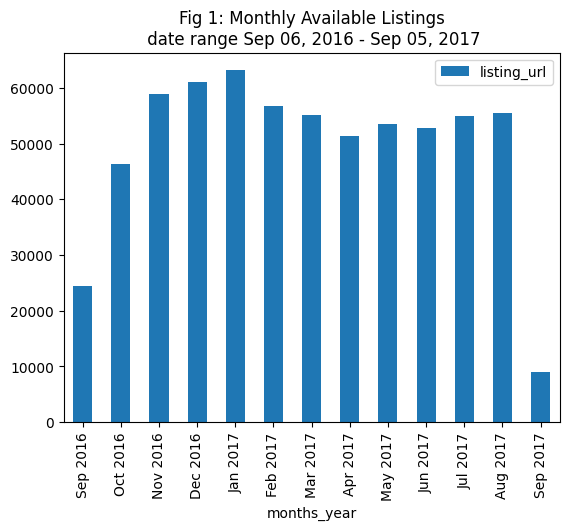

In [202]:
Title_Str = f"Fig 1: Monthly Available Listings\n date range {Boston_dt['listing_date'].min().strftime('%b %d, %Y')} - {Boston_dt['listing_date'].max().strftime('%b %d, %Y')}"
Monthly_stats.plot(x = 'months_year', y = 'listing_url', kind='bar', title = Title_Str)

In [191]:
Boston_dt['listing_date'].min(), Boston_dt['listing_date'].max()# (Timestamp('2016-09-06 00:00:00'), Timestamp('2017-09-05 00:00:00'))
# Monthly_stats.plot(x = 'months', y = 'listing_url', kind='bar', title = 'Fig 1: Monthly Available Listings')

(Timestamp('2016-09-06 00:00:00'), Timestamp('2017-09-05 00:00:00'))

In [186]:
Monthly_stats

,listing_month,months,year,listing_url,clean_price
8,9,September,2016,24401,252.677308
10,10,October,2016,46345,233.416248
11,11,November,2016,58888,202.924416
12,12,December,2016,60997,192.601915
0,1,January,2017,63181,182.799671
1,2,February,2017,56810,180.961028
2,3,March,2017,55181,181.818742
3,4,April,2017,51382,197.252890
4,5,May,2017,53600,193.712295
5,6,June,2017,52731,196.535302


<AxesSubplot: title={'center': 'Fig 2: Monthly Price for available Listings\n date range Sep 06, 2016 - Sep 05, 2017'}, xlabel='months_year', ylabel='clean_price'>

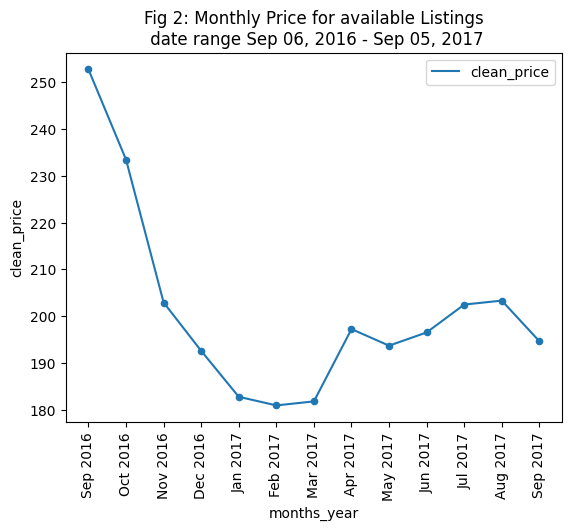

In [205]:
Title_Str = f"Fig 2: Monthly Price for available Listings\n date range {Boston_dt['listing_date'].min().strftime('%b %d, %Y')} - {Boston_dt['listing_date'].max().strftime('%b %d, %Y')}"
Ax = Monthly_stats.plot(x = 'months_year', y = 'clean_price', kind='scatter')
Monthly_stats.plot(x = 'months_year', y = 'clean_price', kind='line', ax=Ax, title = Title_Str, rot= 90)

# Question 3

## Which properties or features of the listing are associated with high prices?


In [12]:
df_boston_listings = df_boston_listings.assign(clean_price = pd.to_numeric(df_boston_listings['price'].str.replace('$','',regex = False).str.replace(',','',regex = False))) # 

In [89]:
df_boston_listings = df_boston_listings.assign(clean_cleaning_fee = pd.to_numeric(df_boston_listings['cleaning_fee'].str.replace('$','',regex = False).str.replace(',','',regex = False))) # 

In [59]:
def get_avg_price(df, col):
    ''' 
    This function will return the mean, standard deviation and count prices, grouped by the columns in col.
    inputs: 
        df, a dataframe that contains clean_price and col
        col, list of columns to group by.
    output: A grouped dataframe containing mean, standard deviation and count. 
    '''
    return df.groupby(col).agg({'clean_price': ['mean', 'std', 'count']})


In [60]:
get_avg_price(df_boston_listings, ['bedrooms'])

clean_price                  
                mean         std count
bedrooms                              
0.0       154.668990   49.813623   287
1.0       136.285834  130.076092  2379
2.0       258.753247  150.956903   693
3.0       316.419355  174.094275   155
4.0       389.400000  176.750260    45
5.0       429.000000  297.732766    16

In [15]:
get_avg_price(df_boston_listings, ["room_type", 'bedrooms'])

clean_price                  
                                mean         std count
room_type       bedrooms                              
Entire home/apt 0.0       154.668990   49.813623   287
                1.0       200.280130  158.715454   921
                2.0       258.753247  150.956903   693
                3.0       316.419355  174.094275   155
                4.0       389.400000  176.750260    45
                5.0       429.000000  297.732766    16
Private room    1.0        96.041364   85.093706  1378
Shared room     1.0        92.762500  108.733822    80

In [16]:
get_avg_price(df_boston_listings, ['accommodates'])

clean_price                  
                    mean         std count
accommodates                              
1              85.507973  104.699916   439
2             131.139582   88.707719  1483
3             180.436916   99.454052   428
4             227.844615  214.820394   650
5             254.800000  128.333505   245
6             275.315271  125.589222   203
7             323.820513  189.643831    39
8             348.581818  202.818446    55
9             351.100000  260.665580    10
10            370.473684  164.216784    19
11            357.500000   86.938676     4
12            505.800000  138.548547     5
14            410.000000  119.209899     3
16            162.500000   53.033009     2

In [17]:
get_avg_price(df_boston_listings, ['bed_type'])

clean_price                  
                     mean         std count
bed_type                                   
Airbed          78.675000   82.029822    40
Couch           99.600000   59.673556    10
Futon           85.254902   40.607311    51
Pull-out Sofa  101.612903   54.262128    31
Real Bed       177.203301  149.712186  3453

In [18]:
get_avg_price(df_boston_listings, ['host_response_time'])

clean_price                  
                          mean         std count
host_response_time                              
a few days or more  150.627907  161.647916    43
within a day        155.127932   95.890165   469
within a few hours  190.050082  121.598576  1218
within an hour      160.638728  114.860113  1384

In [91]:
get_avg_price(df_boston_listings,['clean_cleaning_fee'])

clean_price                  
                          mean         std count
clean_cleaning_fee                              
5.0                  67.545455   22.186791    44
6.0                  47.500000   10.408330     4
7.0                  73.000000   28.583212     3
8.0                  82.428571   50.789950     7
9.0                  92.333333    6.658328     3
...                        ...         ...   ...
200.0               334.428571  166.670574    42
225.0               159.903846   50.938356    52
230.0               113.000000         NaN     1
250.0               407.133333  291.656811    15
300.0               410.000000  410.121933     2

[79 rows x 3 columns]

In [20]:
get_avg_price(df_boston_listings,["minimum_nights", 'maximum_nights'])

clean_price                 
                                      mean        std count
minimum_nights maximum_nights                              
1              1                 83.666667  53.042579    12
               2                133.571429  87.163608    14
               3                131.875000  50.639658    24
               4                100.684211  53.974328    19
               5                109.521739  49.836888    23
...                                    ...        ...   ...
90             365               99.000000        NaN     1
               1125              45.000000        NaN     1
200            1125            1000.000000        NaN     1
273            364               58.000000        NaN     1
300            365               55.000000        NaN     1

[280 rows x 3 columns]

In [21]:
get_avg_price(df_boston_listings,['review_scores_rating', 'review_scores_cleanliness'])

clean_price                  
                                                      mean         std count
review_scores_rating review_scores_cleanliness                              
20.0                 2.0                         82.600000   91.993478     5
                     10.0                        57.000000         NaN     1
40.0                 2.0                         70.500000   45.858478     4
                     3.0                         68.000000         NaN     1
                     4.0                        169.000000         NaN     1
...                                                    ...         ...   ...
99.0                 9.0                         73.000000         NaN     1
                     10.0                       214.734375  132.613083    64
100.0                8.0                        164.666667  130.479325    33
                     9.0                        167.515152  159.249631    33
                     10.0                       185.307692  137.538571   559

[148 rows x 3 columns]

In [22]:
get_avg_price(df_boston_listings,['review_scores_location'])

clean_price                  
                              mean         std count
review_scores_location                              
2.0                     120.000000   74.913283     4
3.0                      75.000000         NaN     1
4.0                     153.111111  185.925687     9
5.0                      55.600000   15.109600     5
6.0                      94.777778  109.043195    18
7.0                     144.534884  123.299162    43
8.0                     126.814346   91.770251   237
9.0                     139.836562   93.576007   826
10.0                    188.138272  119.316307  1620

In [23]:
df_boston_listings = df_boston_listings.assign(
    bedrooms_class = pd.cut(df_boston_listings['bedrooms'], 
                            bins= [0, 1, 2,3, np.Inf], 
                            include_lowest=True, 
                            labels=['upto 1bedroom', '2bedrooms', '3bedrooms', '3bedrooms plus']))

In [24]:
(get_avg_price(df_boston_listings, ["room_type", 'bedrooms_class'])
    .dropna(axis = 0))

clean_price                  
                                      mean         std count
room_type       bedrooms_class                              
Entire home/apt upto 1bedroom   189.443709  142.006693  1208
                2bedrooms       258.753247  150.956903   693
                3bedrooms       316.419355  174.094275   155
                3bedrooms plus  399.786885  213.024655    61
Private room    upto 1bedroom    96.041364   85.093706  1378
Shared room     upto 1bedroom    92.762500  108.733822    80

# Question 4 

## Can we predict the price with those features to inform new hosts? 

In [108]:
def prepare_data(df, cols, target = 'price'):
    '''
    Prepare data by selecting columns (cols) and cleaning target variable.
    Inputs:
        cols - list with column names.
        target - target variable (assumed to be string)
    Outputs:
        X, Y - respectively, predictors and target variable.
    '''
    all_cols = cols.copy()
    all_cols.append(target)
    df_clean = df.dropna(subset = all_cols)
    X = df_clean[cols]
    Y = (df_clean[target]
            .str.replace("$", "", regex=False)
            .str.replace(",", "", regex=False)
            .astype(float))
    return X, Y

In [109]:

today= datetime.today()

In [107]:
def get_cat_num_colnames(df):
    '''
    Returns the names of categorical and numeric variables.
    Inputs:
        df - a data frame.
    Outputs:
        categorical_vars, numeric vars - names of categorical and numeric variables, respectively.
    '''
    categorical_vars = df.select_dtypes(include = ['object', 'category']).columns
    numeric_vars = df.select_dtypes(include = ['number']).columns
    return categorical_vars, numeric_vars


In [126]:
def get_model_pipe(cat_var, num_var, regressor = LinearRegression()):
    '''
    Creates a model pipeline with data preparation steps for categorical and numeric variables.
    Inputs:
        cat_var - categorical variables
        num_var - numerical variables
    Outputs:
        model_pipe - a model pipeline
    '''
    cat_pipe = Pipeline(steps = [('onehot_encoder', OneHotEncoder())])
    num_pipe = Pipeline(steps = [('standardizer', StandardScaler())])
    
    preprocessor = ColumnTransformer([
            ('categorical', cat_pipe, cat_var),
            ('numeric', num_pipe, num_var)
    ])
    model_pipe = Pipeline([
        ('preprpocessor', preprocessor), 
        ('regressor', regressor)
    ])
    return model_pipe

In [127]:
def get_perf_metrics(Y_true, Y_predict, name):
    return pd.DataFrame({
        'MAE': mean_absolute_error(Y_true, Y_predict),
        'RMSE': np.sqrt(mean_squared_error(Y_true, Y_predict)), 
        'MAPE': mean_absolute_percentage_error(Y_true, Y_predict), 
        'R-squared': r2_score(Y_true, Y_predict)
    }, index = pd.Index([name]))


def eval_model(model, X, Y, test_size=0.33, random_state=416):
    '''
    Evaluates model pipeline.
    '''
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    model.fit(X_train, Y_train)
    Y_train_predict = model.predict(X_train)
    Y_test_predict = model.predict(X_test)
    train_perf = get_perf_metrics(Y_train, Y_train_predict, 'train')
    test_perf = get_perf_metrics(Y_test, Y_test_predict, 'test')
    return pd.concat([train_perf, test_perf])

In [144]:
X, Y = prepare_data(df_boston_listings, ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates','review_scores_rating', 'review_scores_cleanliness', 'host_response_time','clean_cleaning_fee'])
cat_var, num_var = get_cat_num_colnames(X)
model_pipe = get_model_pipe(cat_var, num_var)
eval_model(model_pipe, X, Y)

,MAE,RMSE,MAPE,R-squared
train,49.151374,70.520471,0.32414,0.602611
test,49.867008,69.798242,0.34949,0.608510


In [123]:
def run_experiment(df, cols, regressor = LinearRegression()):
    X, Y = prepare_data(df, cols)
    cat_var, num_var = get_cat_num_colnames(X)
    model_pipe = get_model_pipe(cat_var, num_var, regressor)
    return eval_model(model_pipe, X, Y)

In [153]:
run_experiment(df_boston_listings, ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates','review_scores_rating', 'review_scores_cleanliness', 'host_response_time', 'clean_cleaning_fee'])

,MAE,RMSE,MAPE,R-squared
train,49.151374,70.520471,0.32414,0.602611
test,49.867008,69.798242,0.34949,0.608510


In [151]:
run_experiment(df_boston_listings, ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates','review_scores_rating', 'review_scores_cleanliness', 'host_response_time', "minimum_nights", 'maximum_nights','clean_cleaning_fee'], RandomForestRegressor())

,MAE,RMSE,MAPE,R-squared
train,17.795032,27.305841,0.111922,0.940421
test,46.071258,67.252577,0.309355,0.636546


In [141]:
run_experiment(df_boston_listings, ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates','review_scores_rating', 'review_scores_cleanliness', 'host_response_time', "minimum_nights", 'maximum_nights','clean_cleaning_fee'], SVR())

,MAE,RMSE,MAPE,R-squared
train,59.264462,93.567449,0.384647,0.300424
test,58.655215,92.439248,0.407800,0.313336


In [140]:
run_experiment(df_boston_listings, ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates','review_scores_rating', 'review_scores_cleanliness', 'host_response_time', "minimum_nights", 'maximum_nights','clean_cleaning_fee'], GradientBoostingRegressor())

,MAE,RMSE,MAPE,R-squared
train,38.385703,55.009001,0.251256,0.758202
test,46.321104,66.695758,0.316071,0.642540


# Predicting Price 

In [206]:
def Train_model(df, cols, regressor = LinearRegression()):
    X, Y = prepare_data(df, cols)
    cat_var, num_var = get_cat_num_colnames(X)
    model_pipe = get_model_pipe(cat_var, num_var, regressor)
    model_pipe.fit(X,Y)
    return model_pipe

In [208]:
AirBnB_Pricer = Train_model(df_boston_listings, 
                            ['bedrooms','room_type', 'bed_type', 'bathrooms','accommodates',
                             'review_scores_rating', 'review_scores_cleanliness', 
                             'host_response_time', "minimum_nights", 'maximum_nights','clean_cleaning_fee'],
                            RandomForestRegressor())

In [233]:
df_boston_listings['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [229]:
Property_features = pd.DataFrame({
                'bedrooms': 2,
                'room_type':'Entire home/apt', 
                'bed_type':'Real Bed', 
                'bathrooms': 2,
                'accommodates': 2,
                'review_scores_rating': 100, 
                'review_scores_cleanliness': 10, 
                'host_response_time':'within a few hours', 
                "minimum_nights": 1, 
                'maximum_nights':30,
                'clean_cleaning_fee': 20
                }, index= pd.Index([0]))

Predicted_price = AirBnB_Pricer.predict(Property_features)

In [230]:
Property_features.assign(Predicted_price = Predicted_price)

,bedrooms,room_type,bed_type,bathrooms,accommodates,review_scores_rating,review_scores_cleanliness,host_response_time,minimum_nights,maximum_nights,clean_cleaning_fee,Predicted_price
0,2,Entire home/apt,Real Bed,2,2,100,10,within a few hours,1,30,20,243.5


In [246]:
Property_features = pd.read_csv('./src_data/airbnb/boston/project_data/Sample price predictions.csv')

Predicted_price = AirBnB_Pricer.predict(Property_features)

In [247]:
Property_features.assign(Predicted_price = Predicted_price)

,bedrooms,room_type,bed_type,bathrooms,accommodates,review_scores_rating,review_scores_cleanliness,host_response_time,minimum_nights,maximum_nights,clean_cleaning_fee,Predicted_price
0,0,Shared room,Real Bed,1,1,80,8,within a few hours,1,5,20,76.880
1,1,Private room,Real Bed,1,2,80,8,within a few hours,1,5,20,94.780
2,1,Entire home/apt,Real Bed,1,1,90,9,within a few hours,1,30,20,123.070
3,1,Entire home/apt,Real Bed,2,2,100,10,within a few hours,1,30,20,208.250
4,2,Entire home/apt,Real Bed,1,2,90,10,within a few hours,1,30,20,238.490
5,2,Entire home/apt,Real Bed,2,4,100,10,within a few hours,1,30,20,242.330
6,3,Entire home/apt,Real Bed,2,6,100,10,within a few hours,1,30,50,282.215
7,3,Entire home/apt,Real Bed,3,6,100,10,within a few hours,1,30,50,369.420
8,4,Entire home/apt,Real Bed,4,8,100,10,within a few hours,1,30,50,379.620


# Experiments 

In [31]:
df_boston_listings = df_boston_listings.assign(host_start_date = pd.to_datetime(df_boston_listings['host_since']))

In [32]:
(today - df_boston_listings['host_start_date'])/np.timedelta64(1,'Y')

0        7.599945
1       10.452844
2       13.527513
3        9.582189
4        8.528095
          ...    
3580     8.306325
3581     7.386388
3582     8.848430
3583     6.482879
3584     7.252231
Name: host_start_date, Length: 3585, dtype: float64

In [33]:
df_boston_listings = df_boston_listings.assign(bedrooms_class = pd.cut(df_boston_listings['bedrooms'], bins= [0, 1, 2,3, np.Inf], include_lowest=True, labels=['upto 1bedroom', '2bedrooms', '3bedrooms', '3bedrooms plus']))

In [34]:
df = df_boston_listings[['price','bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']].dropna()

In [35]:
Y = df['price'].str.replace('$', '', regex= False).str.replace(',', '', regex= False).astype(float)
X = df[['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']]

In [36]:
lin_reg = LinearRegression(normalize= True)  # Create linear regression object

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state= 416) #Split the data into training/testing sets. #Split the targets into training/testing sets.  

In [38]:
scaler= StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 0.93715659,  1.0270439 ,  1.63213909,  0.85323171,  0.64545531],
       [-0.34204825, -0.59646192, -0.42762492, -0.22399235,  0.64545531],
       [ 2.21636144,  0.48587529,  0.60225709,  0.31461968,  0.64545531],
       ...,
       [-0.34204825, -0.59646192, -0.42762492,  0.42234209,  0.64545531],
       [-0.34204825, -0.59646192, -0.42762492,  0.85323171,  0.64545531],
       [-1.6212531 , -0.59646192, -0.42762492, -0.54715957, -0.23558161]])

In [39]:

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])

In [40]:
pipe.fit(X_train, Y_train)    # Train the model using the training sets

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_regression', LinearRegression())])

In [41]:
Y_train_predict = pipe.predict(X_train)  # Make predictions using the testing set
r2_score(Y_train, Y_train_predict)  # The coefficient of determination

0.4096063809687781

In [42]:
mean_absolute_error(Y_train, Y_train_predict)

63.06048721884802

In [43]:
Y_train_predict = pipe.predict(X_train)   # Make predictions using the testing set
mean_squared_error(Y_train, Y_train_predict)  # The mean squared error

7856.657121159403

In [44]:

encoder = OneHotEncoder(drop= 'first')
encoder.fit_transform(df_boston_listings['room_type'].values.reshape(-1,1))

<3585x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1458 stored elements in Compressed Sparse Row format>

In [45]:
pipe = Pipeline([
    ('onehot', OneHotEncoder(drop= 'first')),
    ('scaler', StandardScaler()),
    ('linear_regression', LinearRegression())
    ])

In [46]:
df = df_boston_listings[['price','bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness', 'room_type']].dropna()
Y = df['price'].str.replace('$', '', regex= False).str.replace(',', '', regex= False).astype(float)
X = df[['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness', 'room_type']]

In [47]:
numeric_vars = ['bedrooms', 'accommodates', 'bathrooms','review_scores_rating', 'review_scores_cleanliness']
categorical_vars = ['room_type']
numeric_pipe = Pipeline([('scaler', StandardScaler())])
categorical_pipe = Pipeline([('onehot', OneHotEncoder(drop= 'first'))])
preprocessor = ColumnTransformer(
    transformers= [
        ('numeric', numeric_pipe, numeric_vars), 
        ('categorical', categorical_pipe, categorical_vars)
    ]
)

In [48]:
model_pipe = Pipeline(
    steps= [
        (
        'preprocessor', preprocessor), 
        ('regressor', LinearRegression())
    ]
)

In [248]:
model_pipe.fit(X_train, Y_train)
Y_train_predict = model_pipe.predict(X_train)

ValueError: A given column is not a column of the dataframe

In [ ]:
Y_test_predict = model_pipe.predict(X_test)
r2_score(Y_test, Y_test_predict)

In [ ]:
model_pipe_rf = Pipeline(
    steps= [
        (
        'preprocessor', preprocessor), 
        ('regressor', RandomForestRegressor())
    ]
)

In [ ]:
model_pipe_rf.fit(X_train, Y_train)
Y_train_predict = model_pipe_rf.predict(X_train)
r2_score(Y_train, Y_train_predict)

In [ ]:
lin_reg.get_params()

In [ ]:
Y_train_predict = lin_reg.predict(X_train)

In [ ]:
r2_score(Y_train, Y_train_predict)

# Question 5 

## Does the number of listing in an area impact the rent in that neighbourhood? 

In [51]:
get_avg_price(df_boston_listings, ['neighbourhood_cleansed'])

clean_price                  
                               mean         std count
neighbourhood_cleansed                               
Allston                  112.307692   79.980147   260
Back Bay                 240.950331  130.481478   302
Bay Village              266.833333  148.640701    24
Beacon Hill              224.443299  162.333947   194
Brighton                 118.767568   98.491254   185
Charlestown              198.045045  135.660297   111
Chinatown                232.352113   87.948053    71
Dorchester                91.639405   56.984681   269
Downtown                 236.459302   99.179108   172
East Boston              119.153333   66.080969   150
Fenway                   220.393103  265.336016   290
Hyde Park                 86.548387   66.468458    31
Jamaica Plain            138.478134  104.015175   343
Leather District         253.600000   93.417343     5
Longwood Medical Area    138.444444  102.898143     9
Mattapan                  75.125000   33.171901    24
Mission Hill             121.967742  103.742641   124
North End                195.678322   93.497880   143
Roslindale                98.428571   54.793449    56
Roxbury                  146.333333  152.956916   144
South Boston             187.609195  125.155243   174
South Boston Waterfront  306.060241  338.001203    83
South End                204.349693  119.290546   326
West End                 209.591837   79.530895    49
West Roxbury             107.108696   67.772570    46

In [ ]:
df_boston_reviews.info()
df_boston_reviews.head(n=50)

In [ ]:
df_boston_calendar.info()


In [ ]:
df_boston_calendar.head(n=100)

In [ ]:
df_boston_listings.info()


In [ ]:
df_boston_listings.head(n=50)

In [ ]:
df_seattle_reviews.info()


In [ ]:
df_seattle_reviews.head(n=50)

# seattle Analysis

## Data Preparation 

In [ ]:
df_seattle_listings = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\listings.csv")
df_seattle_calendar = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\calendar.csv")
df_seattle_reviews = pd.read_csv(".\\src_data\\airbnb\\seattle\\project_data\\reviews.csv")

In [ ]:
df_seattle_calendar.info()


In [ ]:
df_seattle_calendar.head(n=50)

df_seattle_listings.info()

In [ ]:
df_seattle_listings.head(n=50)

price should be converted to float 

date will be separated to year/month/day
